In [4]:
#dataset obtained from dataworld
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

This is a personal notebook, so brace up. My notebook might be somehow rough at times. 
The purpose of this EDA is to manipulate the data in other to display the date value in more suitable form and also 
visualize it, this same project would be done in tableau where more visualization and dashboard woul be added.

In [5]:
df = pd.read_excel('Personal Consumption Expenditures.xlsx')

In [6]:
pip install openpyxl

In [7]:
df.head(10)

,Category,Sub-Category,Month,Millions of Dollars
0,Alcoholic beverages,Beer,1976-01-01,9908
1,Alcoholic beverages,Beer,1976-02-01,9994
2,Alcoholic beverages,Beer,1976-03-01,10127
3,Alcoholic beverages,Beer,1976-04-01,10204
4,Alcoholic beverages,Beer,1976-05-01,10233
5,Alcoholic beverages,Beer,1976-06-01,10481
6,Alcoholic beverages,Beer,1976-07-01,10500
7,Alcoholic beverages,Beer,1976-08-01,10537
8,Alcoholic beverages,Beer,1976-09-01,10586
9,Alcoholic beverages,Beer,1976-10-01,10752


In [8]:
df.tail(10)

,Category,Sub-Category,Month,Millions of Dollars
14890,Fats and oils,Fats and oils,2021-01-01,26726
14891,Fresh fruits and vegetables,Fruit (fresh),2021-01-01,47148
14892,Fresh fruits and vegetables,Vegetables (fresh),2021-01-01,57305
14893,Processed fruits and vegetables,Processed fruits and vegetables,2021-01-01,34900
14894,Sugar and sweets,Sugar and sweets,2021-01-01,53817
14895,"Coffee, tea, and other beverage materials","Coffee, tea, and other beverage materials",2021-01-01,18768
14896,"Mineral waters, soft drinks, and vegetable juices","Mineral waters, soft drinks, and vegetable juices",2021-01-01,93320
14897,Alcoholic beverages,Spirits,2021-01-01,39325
14898,Alcoholic beverages,Wine,2021-01-01,54832
14899,Alcoholic beverages,Beer,2021-01-01,79753


In [9]:
df.isnull().sum()

Category               0
Sub-Category           0
Month                  0
Millions of Dollars    0
dtype: int64

In [10]:
df.columns

Index(['Category', 'Sub-Category', 'Month', 'Millions of Dollars'], dtype='object')

In [11]:
df['Month'] = pd.to_datetime(df['Month'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Category             14900 non-null  object        
 1   Sub-Category         14900 non-null  object        
 2   Month                14900 non-null  datetime64[ns]
 3   Millions of Dollars  14900 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 465.8+ KB


In [13]:
df.shape

(14900, 4)

In [14]:
x = df['Category'].unique()
y = df['Category'].nunique()
print(x)
print('Number Of Unique:', y)


['Alcoholic beverages' 'Cereals and bakery products' 'Fats and oils'
 'Fish and seafood' 'Fresh fruits and vegetables' 'Meats and poultry'
 'Milk, dairy products, and eggs' 'Processed fruits and vegetables'
 'Sugar and sweets' 'Coffee, tea, and other beverage materials'
 'Mineral waters, soft drinks, and vegetable juices']
Number Of Unique: 11


In [15]:
x= df['Sub-Category'].unique()
y = df['Sub-Category'].nunique()
print(x)
print('Number Of Unique:', y)

['Beer' 'Spirits' 'Wine' 'Bakery products' 'Cereals' 'Fats and oils'
 'Fish and seafood' 'Fruit (fresh)' 'Vegetables (fresh)' 'Beef and veal'
 'Other meats' 'Pork' 'Poultry' 'Eggs' 'Fresh milk'
 'Processed dairy products' 'Processed fruits and vegetables'
 'Sugar and sweets' 'Coffee, tea, and other beverage materials'
 'Mineral waters, soft drinks, and vegetable juices']
Number Of Unique: 20


I have this habit of sampling the datafeame often just to make sure am doing the right thing. :)

In [16]:
df.sample(10)

,Category,Sub-Category,Month,Millions of Dollars
12318,Meats and poultry,Beef and veal,2013-03-01,41293
12842,Meats and poultry,Pork,2019-07-01,36142
11077,Cereals and bakery products,Cereals,2003-02-01,27964
864,Cereals and bakery products,Cereals,1988-01-01,15089
9999,"Coffee, tea, and other beverage materials","Coffee, tea, and other beverage materials",1998-04-01,6880
13567,"Milk, dairy products, and eggs",Processed dairy products,2005-04-01,31609
14243,"Coffee, tea, and other beverage materials","Coffee, tea, and other beverage materials",2005-08-01,8271
7664,"Mineral waters, soft drinks, and vegetable juices","Mineral waters, soft drinks, and vegetable juices",1974-09-01,9982
14120,Sugar and sweets,Sugar and sweets,2014-01-01,40393
9895,Sugar and sweets,Sugar and sweets,1999-12-01,31266


In [17]:
df.describe()

,Millions of Dollars
count,14900.000000
mean,18466.317919
std,17313.017113
min,524.000000
25%,5630.750000
50%,12827.500000
75%,26317.750000
max,115310.000000


In [18]:
df.isnull().any()

Category               False
Sub-Category           False
Month                  False
Millions of Dollars    False
dtype: bool

From the next cell hence, i would be start doing some simple visualizations.

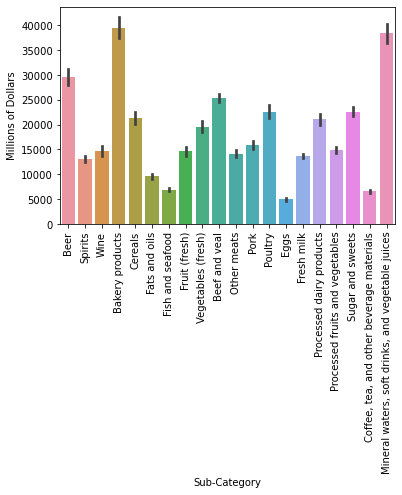

In [19]:
ax = sns.barplot(x='Sub-Category', y='Millions of Dollars', data=df)
ax.tick_params(axis='x', rotation=90)

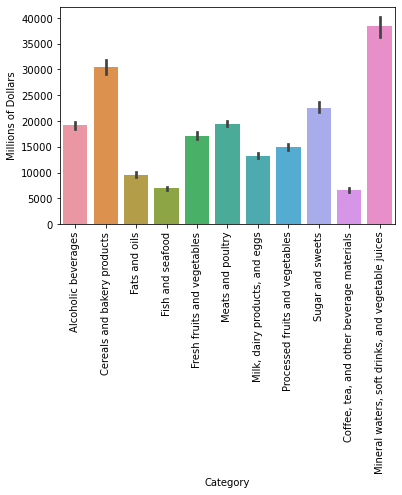

In [20]:
ax = sns.barplot(x='Category', y='Millions of Dollars', data=df)
ax.tick_params(axis='x', rotation=90)

Am simplifying the month coulmn so i can comfortably plot graphs for to see trend in the datetime better.

In [21]:
import datetime
df['Weekday_num'] = pd.DatetimeIndex(df['Month']).weekday
df['Weekday'] = pd.DatetimeIndex(df['Month']).day_name()
df['Year'] = pd.DatetimeIndex(df['Month']).year
df['Month name'] = pd.DatetimeIndex(df['Month']).month_name()
#df.drop('Weekday_name', axis='columns', inplace=True)

In [22]:
df.head(10)

,Category,Sub-Category,Month,Millions of Dollars,Weekday_num,Weekday,Year,Month name
0,Alcoholic beverages,Beer,1976-01-01,9908,3,Thursday,1976,January
1,Alcoholic beverages,Beer,1976-02-01,9994,6,Sunday,1976,February
2,Alcoholic beverages,Beer,1976-03-01,10127,0,Monday,1976,March
3,Alcoholic beverages,Beer,1976-04-01,10204,3,Thursday,1976,April
4,Alcoholic beverages,Beer,1976-05-01,10233,5,Saturday,1976,May
5,Alcoholic beverages,Beer,1976-06-01,10481,1,Tuesday,1976,June
6,Alcoholic beverages,Beer,1976-07-01,10500,3,Thursday,1976,July
7,Alcoholic beverages,Beer,1976-08-01,10537,6,Sunday,1976,August
8,Alcoholic beverages,Beer,1976-09-01,10586,2,Wednesday,1976,September
9,Alcoholic beverages,Beer,1976-10-01,10752,4,Friday,1976,October


<AxesSubplot:xlabel='count', ylabel='Category'>

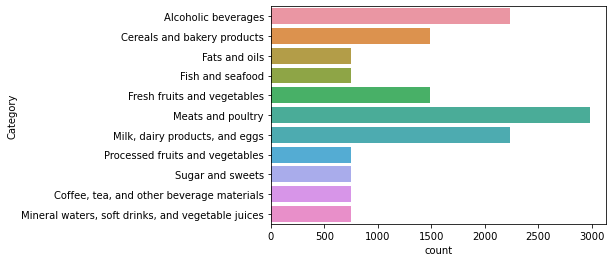

In [23]:
sns.countplot(y='Category', data=df)

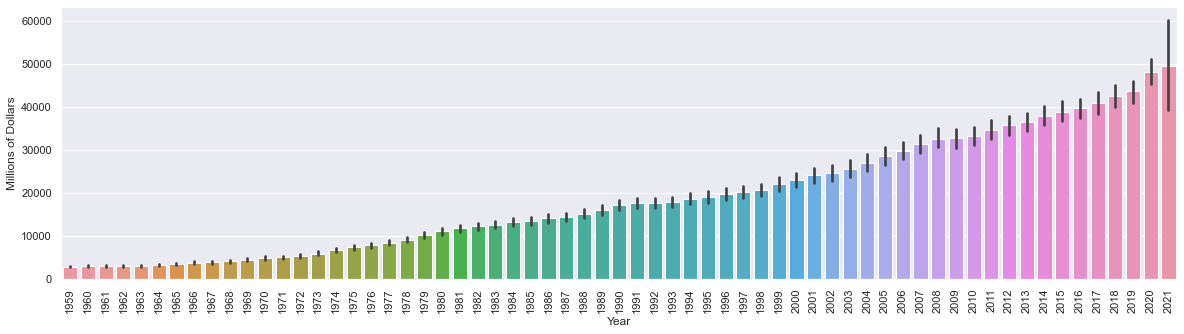

In [24]:
#df.groupby(['Year'])['Millions of Dollars'].sum().plot(kind='bar')
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.barplot(x='Year', y='Millions of Dollars', data=df)
ax.tick_params(axis='x', rotation=90)

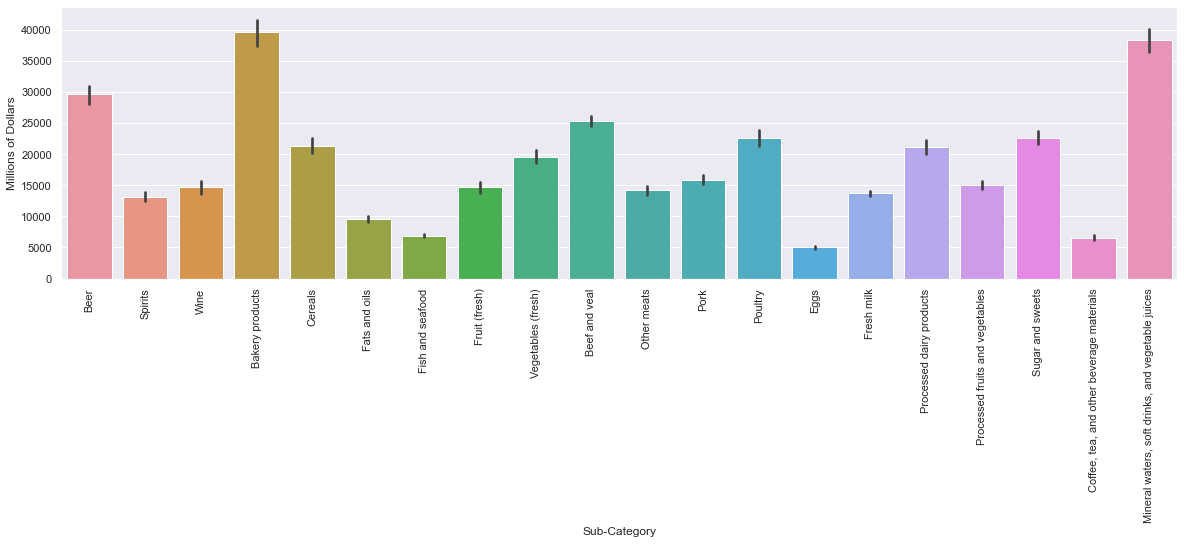

In [25]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.barplot(x='Sub-Category', y='Millions of Dollars', data=df)
ax.tick_params(axis='x', rotation=90)

In [26]:
df.loc[df['Sub-Category']== 'Beer']

,Category,Sub-Category,Month,Millions of Dollars,Weekday_num,Weekday,Year,Month name
0,Alcoholic beverages,Beer,1976-01-01,9908,3,Thursday,1976,January
1,Alcoholic beverages,Beer,1976-02-01,9994,6,Sunday,1976,February
2,Alcoholic beverages,Beer,1976-03-01,10127,0,Monday,1976,March
3,Alcoholic beverages,Beer,1976-04-01,10204,3,Thursday,1976,April
4,Alcoholic beverages,Beer,1976-05-01,10233,5,Saturday,1976,May
...,...,...,...,...,...,...,...,...
14819,Alcoholic beverages,Beer,2020-09-01,78580,1,Tuesday,2020,September
14839,Alcoholic beverages,Beer,2020-10-01,77572,3,Thursday,2020,October
14859,Alcoholic beverages,Beer,2020-11-01,78407,6,Sunday,2020,November
14879,Alcoholic beverages,Beer,2020-12-01,76988,1,Tuesday,2020,December


In [27]:
df['Month name'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [28]:
x= df.loc[df['Year']== 2021].nunique()